In [ ]:
# 1. 기계학습이란 모델에게 데이터를 줘서 학습시킨 다음 우리가 원하는 결과를 얻도록 유도하는 과정이다. 
# 2. 데이터셋은 훈련세트와 테스트세트로 나뉘는데 우선 훈련세트로 모델을 학습시킨 후 테스트 세트로 평가한다.
# 3. 지도학습이란 모델에게 문제와 정답으로 짝지어진 데이터의 집합을 줘서 학습 시킨 다음 아무 문제를 주어 정답을 유도하도록 하는 학습이다.
# 4. 데이터 셋의 각 피처의 타입을 확인하고 중복 데이터 삭제 후 결측치와 이상치를 대체 혹은 제거한다. 필요한 경우 그대로 둔다. 그리고 각 특성의 분포를 확인한다.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures

In [50]:
data_file = '../DATA/Iris.csv'
irisDF = pd.read_csv(data_file)

In [51]:
irisDF.shape

(150, 5)

In [52]:
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [53]:
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [54]:
# 중복데이터 제거
irisDF = irisDF.drop_duplicates()

irisDF.reset_index(drop = True, inplace = True)

In [55]:
# 결측값 없음
irisDF.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

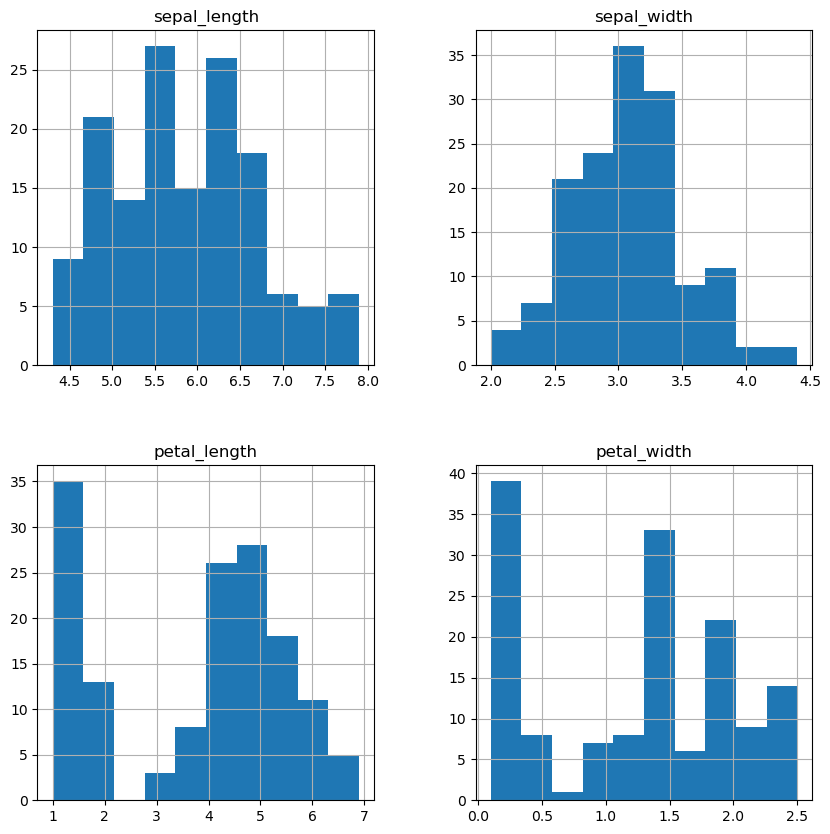

In [73]:
irisDF.hist(figsize = (10, 10))
plt.show()

In [57]:
irisDF.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [58]:
bool = irisDF['species'].isin(['versicolor', 'virginica'])

In [59]:
bool

0      False
1      False
2      False
3      False
4      False
       ...  
142     True
143     True
144     True
145     True
146     True
Name: species, Length: 147, dtype: bool

In [60]:
irisDF[bool]

,sepal_length,sepal_width,petal_length,petal_width,species
48,7.0,3.2,4.7,1.4,versicolor
49,6.4,3.2,4.5,1.5,versicolor
50,6.9,3.1,4.9,1.5,versicolor
51,5.5,2.3,4.0,1.3,versicolor
52,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,virginica
143,6.3,2.5,5.0,1.9,virginica
144,6.5,3.0,5.2,2.0,virginica
145,6.2,3.4,5.4,2.3,virginica


In [61]:
bool = irisDF.species.isin(['versicolor', 'virginica'])
twoflowerDF = irisDF[bool]
featureDF = twoflowerDF[twoflowerDF.columns[:-1]]
targetSR = twoflowerDF.species
targetSR = targetSR.replace({'versicolor' : 0, 'virginica' : 1})

In [64]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size = 0.2, random_state = 42, stratify = targetSR)

### 분류 - versicolor, virginica 선택

In [67]:
model = KNeighborsClassifier()
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test) 
model.fit(X_train, y_train)

KNeighborsClassifier()

In [71]:
print(f'훈련 스코어 : {model.score(X_train, y_train):.2f}\n\n테스트 스코어 : {model.score(X_test, y_test):.2f}')

훈련 스코어 : 0.99

테스트 스코어 : 0.85


### 회귀

In [76]:
bool = irisDF.species.isin(['versicolor'])
oneflowerDF = irisDF[bool]
featureDF = oneflowerDF[['sepal_length', 'sepal_width','petal_width']]
targetSR = oneflowerDF['petal_length']


In [78]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size = 0.2, random_state = 42)

In [79]:
model = LinearRegression()
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test) 
model.fit(X_train, y_train)

LinearRegression()

In [80]:
print(f'훈련 스코어 : {model.score(X_train, y_train):.2f}\n\n테스트 스코어 : {model.score(X_test, y_test):.2f}')

훈련 스코어 : 0.79

테스트 스코어 : 0.67


In [88]:
y_pre  = model.predict(X_test)

In [98]:
print(f'r2 score : {r2_score(y_pre, y_test):.2f}')
print(f'평균 절댓값 오차 : {mean_absolute_error(y_pre, y_test):.2f}')
print(f'평균 제곱 오차 : {mean_squared_error(y_pre, y_test):.2f}')
print(f'루트 평균 제곱 오차 : {np.sqrt(mean_squared_error(y_pre, y_test)):.2f}')

r2 score : 0.37
평균 절댓값 오차 : 0.21
평균 제곱 오차 : 0.08
루트 평균 제곱 오차 : 0.28


In [99]:
np.sqrt(16)

4.0